In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_ds = pd.read_csv('project8.csv')
test_ds = pd.read_csv('project_8.csv')

In [3]:
train_ds.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.00,NaN,S
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.50,NaN,S
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.60,A16,C
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.75,NaN,Q
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.50,C52,S


In [4]:
test_ds.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
202,1094,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C
244,1136,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
278,1170,2,"Ware, Mr. John James",male,30.0,1,0,CA 31352,21.0000,NaN,S
246,1138,2,"Karnes, Mrs. J Frank (Claire Bennett)",female,22.0,0,0,F.C.C. 13534,21.0000,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [5]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
missing_values_train = train_ds.isna().sum()
missing_values_train

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
missing_values_test = test_ds.isna().sum()
missing_values_test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
import re

# Define the deck level dictionary
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

# Create a list of datasets
data = [train_ds, test_ds]

for dataset in data:
    # Fill missing Cabin values with 'U0'
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    
    # Extract the first sequence of letters which represents the Deck and map it to a number
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    
    # Fill missing Deck values with 0
    dataset['Deck'] = dataset['Deck'].fillna(0)
    
    # Convert Deck to an integer type
    dataset['Deck'] = dataset['Deck'].astype(int)
    
    # Drop the Cabin column as it's no longer needed
    dataset.drop(['Cabin'], axis=1, inplace=True)

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

data = [train_ds, test_ds]
for dataset in data:
    dataset['Age'] = imputer.fit_transform(dataset['Age'].values.reshape(-1, 1))
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])  
    dataset['Fare'] = (dataset['Fare'].fillna(0)).astype(int)

In [11]:
data = [train_ds, test_ds]
for dataset in data:
  dataset['isAlone'] = (dataset['SibSp'] + dataset['Parch'] == 0).astype(int)
  dataset['isFamily'] = (dataset['SibSp'] + dataset['Parch'] > 0).astype(int)

In [12]:
data = [train_ds, test_ds]

for dataset in data:
    # Create the FamilySize feature by adding SibSp, Parch, and 1 - for the individual themselves
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    # Extract Title from the Name column
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Consolidate rare titles into a single 'Rare' category
    rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
    dataset['Title'] = dataset['Title'].replace(rare_titles, 'Rare')
   # Replace 'Mlle' and 'Ms' with 'Miss', and 'Mme' with 'Mrs'
    dataset['Title'] = dataset['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

    # Extract An AgeGroup from the Age column
    dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=[0, 12, 18, 60, np.inf], labels=['Child', 'Teenager', 'Adult', 'Senior'])

    # Create a fare per person feature
    dataset['FarePerPerson'] = (dataset['Fare'] / dataset['FamilySize']).astype(int)

In [13]:
columns_to_drop = ['Name', 'Ticket']

data = [train_ds, test_ds]

for dataset in data:
    dataset.drop(columns=columns_to_drop, inplace=True)

In [14]:
train_ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Deck             0
isAlone          0
isFamily         0
FamilySize       0
Title            0
AgeGroup         0
FarePerPerson    0
dtype: int64

In [15]:
test_ds.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Deck             0
isAlone          0
isFamily         0
FamilySize       0
Title            0
AgeGroup         0
FarePerPerson    0
dtype: int64

In [16]:
def category_mapping(data):
  mapping = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2},
    'Title': {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5},
    'AgeGroup': {'Child': 1, 'Teenager': 2, 'Adult': 3, 'Senior': 4}   
  }

  # loop over each dataframe in the list
  for df in data:
    # map the categorical features to numerical values using the mapping dict
    for feature, value in mapping.items():
      df[feature] = df[feature].map(value)

  return data

data = category_mapping([train_ds, test_ds])

In [17]:
from sklearn.preprocessing import StandardScaler

def normalize_data(data):
    scaler = StandardScaler()

    for i in range(len(data)):
        # apply scaling to the whole data and update the original dataframe
        data[i][:] = scaler.fit_transform(data[i])

    return data

data = normalize_data([train_ds, test_ds])

In [18]:
X = train_ds.drop(columns='Survived')
y = train_ds['Survived'].astype(int)

from sklearn.model_selection import train_test_split

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
!pip install xgboost 

In [20]:
# apply different classifier with kfold and cross validation score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# create a list of classifiers
classifiers = [RandomForestClassifier, DecisionTreeClassifier, SVC, LogisticRegression, KNeighborsClassifier, GaussianNB, XGBClassifier]
# create a list of classifiers names
classifiers_names = ['RandomForestClassifier', 'DecisionTreeClassifier', 'SVC', 'LogisticRegression', 'KNeighborsClassifier', 'GaussianNB', 'XGBClassifier']

# create a list of classifiers scores
classifiers_scores = []

# loop over each classifier and calculate the cross validation score
for classifier, name in zip(classifiers, classifiers_names):
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    model = classifier()
    cv_score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    classifiers_scores.append(cv_score.mean())

# create a dataframe of classifiers and their scores
classifiers_df = pd.DataFrame({'Classifier': classifiers_names, 'Score': classifiers_scores})
classifiers_df

,Classifier,Score
0,RandomForestClassifier,0.825980
1,DecisionTreeClassifier,0.766517
2,SVC,0.822672
3,LogisticRegression,0.810337
4,KNeighborsClassifier,0.806954
5,GaussianNB,0.766567
6,XGBClassifier,0.808040


In [21]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Setup the RandomizedSearchCV instance

random_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=0, n_jobs=-1)

# Fit the RandomizedSearchCV instance to the data
random_search.fit(X, y)

# Print the best parameters and the corresponding score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Retrieve the best estimator
best_rf = random_search.best_estimator_

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
Best score: 0.8294051627384961


In [22]:
best_rf.score(X, y)

0.9158249158249159

In [23]:
df_params = pd.DataFrame([best_rf.get_params()], index=["Params"]).T
df_params

,Params
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,10
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,2


In [24]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
12,Title,0.208978
2,Sex,0.186368
6,Fare,0.090717
0,PassengerId,0.089501
3,Age,0.085116
14,FarePerPerson,0.082310
1,Pclass,0.064821
8,Deck,0.052145
11,FamilySize,0.046365
4,SibSp,0.024126


In [26]:
palette_colors = ["#461FFF", "#32FFD9", "#002BF5", "#2B99FF", "#1CCBE8"]
sns.color_palette(palette_colors)

[(0.27450980392156865, 0.12156862745098039, 1.0),
 (0.19607843137254902, 1.0, 0.8509803921568627),
 (0.0, 0.16862745098039217, 0.9607843137254902),
 (0.16862745098039217, 0.6, 1.0),
 (0.10980392156862745, 0.796078431372549, 0.9098039215686274)]

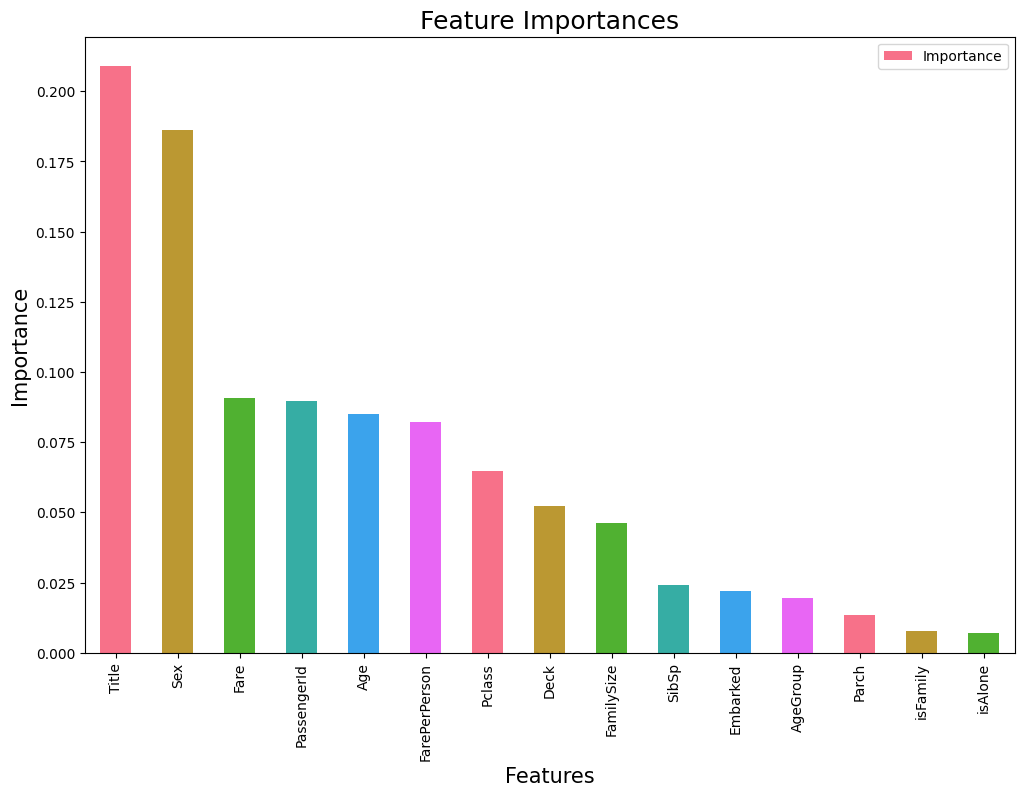

In [28]:
feature_importances.plot(kind='bar', x='Feature', y='Importance', color=sns.color_palette("husl"), figsize=(12, 8))
plt.title('Feature Importances', size=18)
plt.xlabel('Features', size=15)
plt.ylabel('Importance', size=15)
plt.show()

In [29]:
# Evaluate the model on the test set and generate all classification metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)  # Renamed variable to avoid conflict

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)  # Renamed variable to avoid conflict

# Generate the accuracy score
accuracy = accuracy_score(y_test, y_pred)  # Renamed variable to avoid conflict

print(f"Classification Report:\n{report}\n")
print(f"Confusion Matrix:\n{matrix}\n")
print(f"Accuracy Score: {accuracy}\n")

# Make predictions on the test set (assuming test_ds is prepared correctly)
test_predictions = best_rf.predict(test_ds)
# Now you can use test_predictions for further analysis or export

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.92      0.89      0.90        74

    accuracy                           0.92       179
   macro avg       0.92      0.92      0.92       179
weighted avg       0.92      0.92      0.92       179


Confusion Matrix:
[[99  6]
 [ 8 66]]

Accuracy Score: 0.9217877094972067



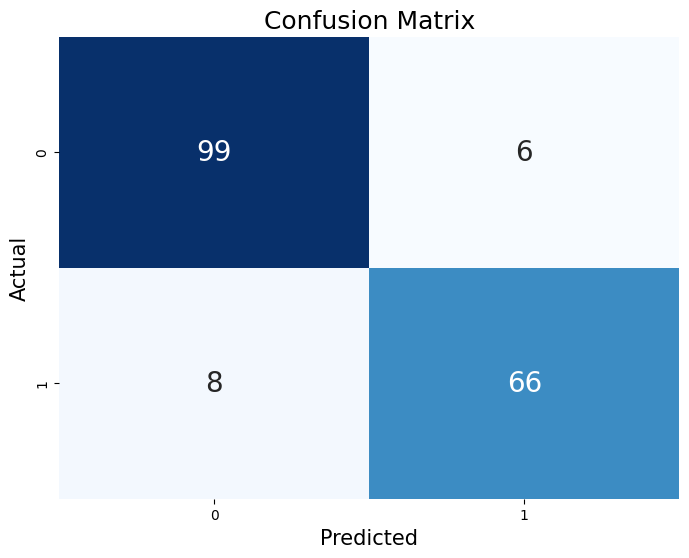

In [30]:
# Generate Confusion Matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 20})
plt.xlabel('Predicted', size=15)
plt.ylabel('Actual', size=15)
plt.title('Confusion Matrix', size=18)
plt.show()

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

scores_df = pd.DataFrame({
    'Model': ['RandomForest'],
    'Accuracy': [accuracy],
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}, index=["Metrics"])

scores_df.T

,Metrics
Model,RandomForest
Accuracy,0.921788
Precision,0.916667
Recall,0.891892
F1 Score,0.90411
